## Import Libraries

In [139]:
!pip install gensim

     ---------------------------------------- 0.0/59.0 kB ? eta -:--:--
     ------------------- ------------------ 30.7/59.0 kB 660.6 kB/s eta 0:00:01
     ---------------------------------------- 59.0/59.0 kB 1.1 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/60.3 kB ? eta -:--:--
   ---------------------------------------- 60.3/60.3 kB 3.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/42.2 MB ? eta -:--:--
   ---------------------------------------- 0.2/42.2 MB 3.5 MB/s eta 0:00:13
   ---------------------------------------- 0.5/42.2 MB 6.3 MB/s eta 0:00:07
    --------------------------------------- 0.9/42.2 MB 6.4 MB/s eta 0:00:07
   - -------------------------------------- 1.1/42.2 MB 5.8 MB/s eta 0:00:08
   - ---------------------------------

  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
librosa 0.10.1 requires pooch>=1.0, which is not installed.


In [140]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import nltk
import scipy
import sklearn

import re
import string
import tqdm
from gensim.models import Word2Vec

from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neural_network import MLPClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.utils import resample
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, r2_score, roc_curve, auc

import warnings
warnings.filterwarnings("ignore")

In [136]:
genre_list = [ 'action', 'adult', 'adventure', 'animation', 'biography', 'comedy', 'crime', 'documentary', 'family', 'fantasy', 'game-show', 'history', 'horror', 'music', 'musical', 'mystery', 'news', 'reality-tv', 'romance', 'sci-fi', 'short', 'sport', 'talk-show', 'thriller', 'war', 'western' ]

## Import and Explore Datasets 

In [137]:
fallback_genre = 'Unknown'

In [141]:
# try:
#     with tqdm(total=50, desc="Loading Train Data") as pbar:
#         df_train = pd.read_csv('C:/Users/sanso/Desktop/CODSOFT/MOVIE GENRE CLASSIFICATION/Genre Classification Dataset/train_data.txt', sep=':::', header=None, names=['Id', 'Title', 'Genre', 'Description'], engine='python')
#         df_test = pd.read_csv("C:/Users/sanso/Desktop/CODSOFT/MOVIE GENRE CLASSIFICATION/Genre Classification Dataset/test_data.txt", sep=':::', names=['Id', 'Title', 'Description'], engine='python'
#         pbar.update(50)
# except Exception as e:
#     print(f"Error loading train_data: {e}")
#     raise

In [2]:
train_path = "C:/Users/sanso/Desktop/CODSOFT/MOVIE GENRE CLASSIFICATION/Genre Classification Dataset/train_data.txt"
df_train = pd.read_csv(train_path, sep=':::', names=['Id', 'Title', 'Genre', 'Description'], engine='python')
df_train

,Id,Title,Genre,Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...,...
54209,54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...
54210,54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...
54211,54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g..."
54212,54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...


In [3]:
test_path = "C:/Users/sanso/Desktop/CODSOFT/MOVIE GENRE CLASSIFICATION/Genre Classification Dataset/test_data.txt"
df_test = pd.read_csv(test_path, sep=':::', names=['Id', 'Title', 'Description'], engine='python')
df_test

,Id,Title,Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...
...,...,...,...
54195,54196,"""Tales of Light & Dark"" (2013)","Covering multiple genres, Tales of Light & Da..."
54196,54197,Der letzte Mohikaner (1965),As Alice and Cora Munro attempt to find their...
54197,54198,Oliver Twink (2007),A movie 169 years in the making. Oliver Twist...
54198,54199,Slipstream (1973),"Popular, but mysterious rock D.J Mike Mallard..."


In [4]:
df_train.columns

Index(['Id', 'Title', 'Genre', 'Description'], dtype='object')

In [5]:
df_test.columns

Index(['Id', 'Title', 'Description'], dtype='object')

In [6]:
print("Shape before drop", df_train.shape)

Shape before drop (54214, 4)


In [7]:
df_test.shape

(54200, 3)

In [8]:
print("="*50)
print("First Five Rows", "\n")
print(df_train.head(5), "\n")

print("="*50)
print("Information About Dataset", "\n")
print(df_train.info(), "\n")

print("="*50)
print("Describe the Dataset", "\n")
print(df_train.describe(), "\n")

print("="*50)
print("Null Values", "\n")
print(df_train.isnull().sum(), "\n")

First Five Rows 

   Id                               Title       Genre  \
0   1       Oscar et la dame rose (2009)       drama    
1   2                       Cupid (1997)    thriller    
2   3   Young, Wild and Wonderful (1980)       adult    
3   4              The Secret Sin (1915)       drama    
4   5             The Unrecovered (2007)       drama    

                                         Description  
0   Listening in to a conversation between his do...  
1   A brother and sister with a past incestuous r...  
2   As the bus empties the students for their fie...  
3   To help their unemployed father make ends mee...  
4   The film's title refers not only to the un-re...   

Information About Dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           54214 non-null  int64 
 1   Title        54214 non-null  object
 2   Ge

In [9]:
print("="*50)
print("First Five Rows", "\n")
print(df_test.head(5), "\n")

print("="*50)
print("Information About Dataset", "\n")
print(df_test.info(), "\n")

print("="*50)
print("Describe the Dataset", "\n")
print(df_test.describe(), "\n")

print("="*50)
print("Null Values", "\n")
print(df_test.isnull().sum(), "\n")

First Five Rows 

   Id                          Title  \
0   1          Edgar's Lunch (1998)    
1   2      La guerra de papá (1977)    
2   3   Off the Beaten Track (2010)    
3   4        Meu Amigo Hindu (2015)    
4   5             Er nu zhai (1955)    

                                         Description  
0   L.R. Brane loves his life - his car, his apar...  
1   Spain, March 1964: Quico is a very naughty ch...  
2   One year in the life of Albin and his family ...  
3   His father has died, he hasn't spoken with hi...  
4   Before he was known internationally as a mart...   

Information About Dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           54200 non-null  int64 
 1   Title        54200 non-null  object
 2   Description  54200 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB
None 

Describe th

In [10]:
df_train.Genre.value_counts()

Genre
 drama           13613
 documentary     13096
 comedy           7447
 short            5073
 horror           2204
 thriller         1591
 action           1315
 western          1032
 reality-tv        884
 family            784
 adventure         775
 music             731
 romance           672
 sci-fi            647
 adult             590
 crime             505
 animation         498
 sport             432
 talk-show         391
 fantasy           323
 mystery           319
 musical           277
 biography         265
 history           243
 game-show         194
 news              181
 war               132
Name: count, dtype: int64

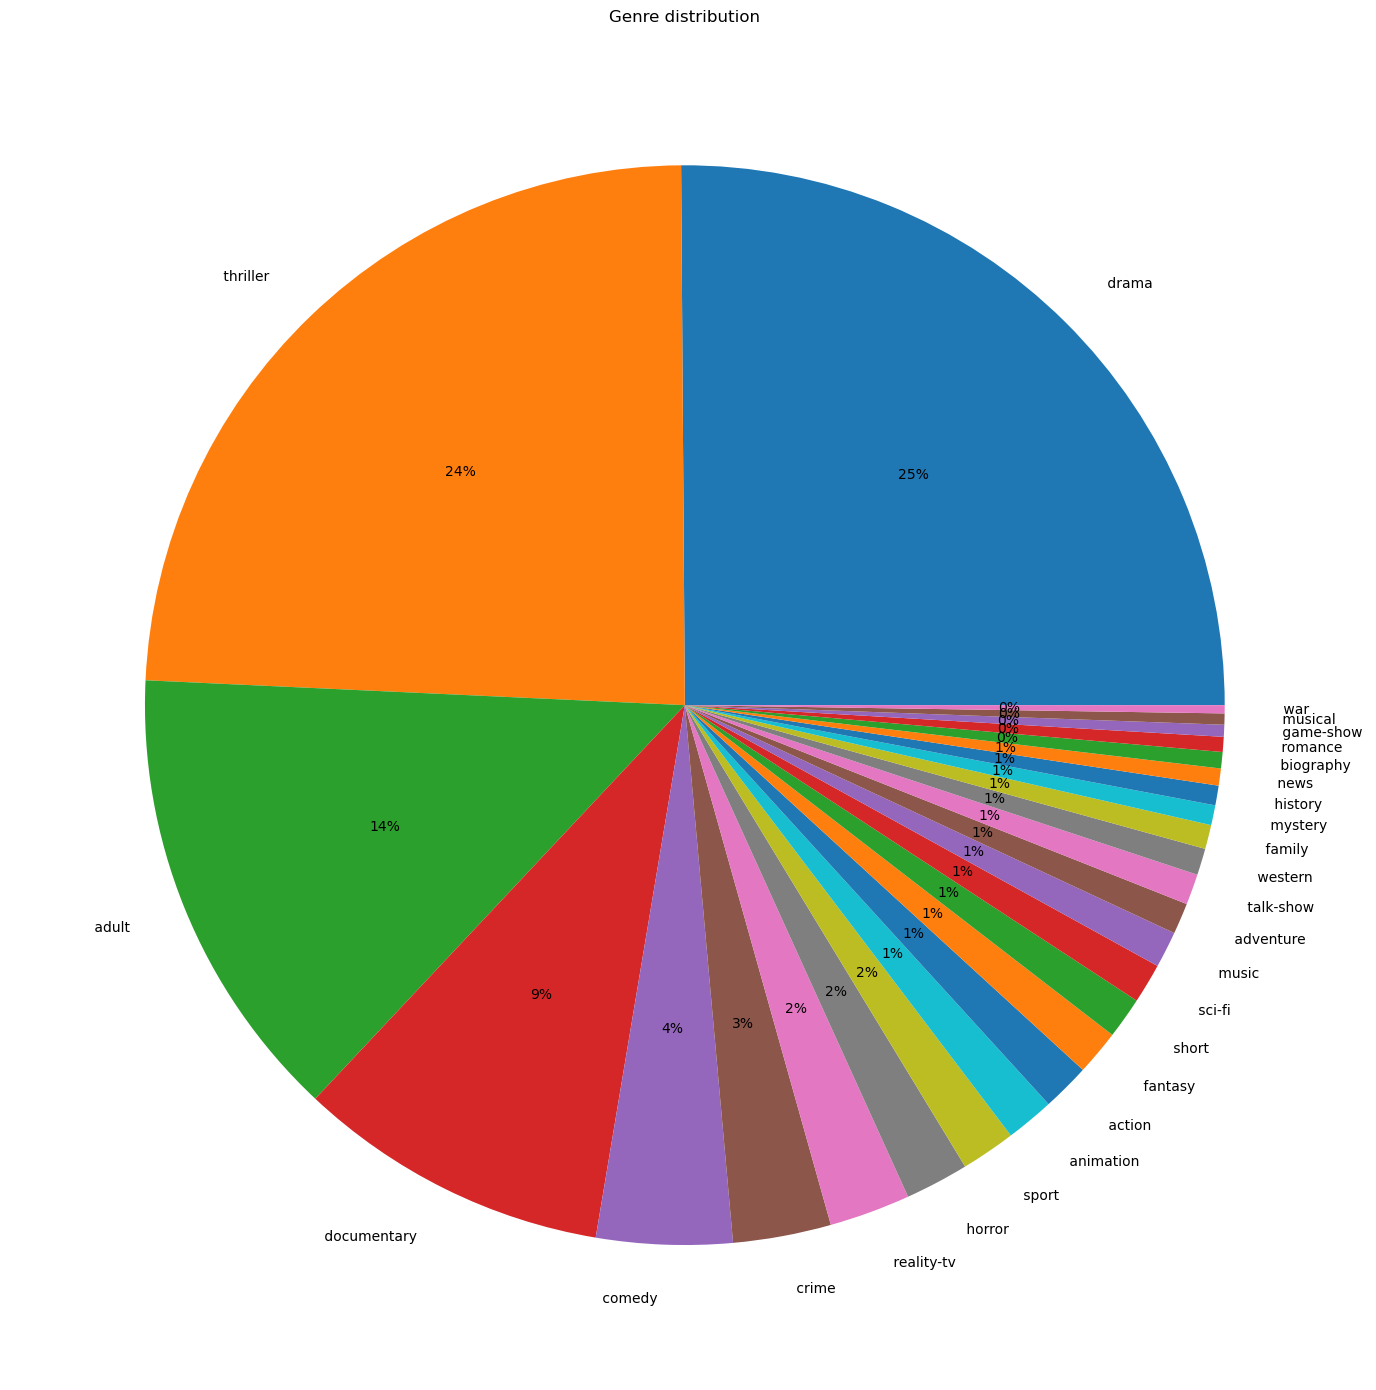

In [11]:
# Genre distribution

plt.figure(figsize = (14,14))

plt.pie(df_train['Genre'].value_counts().values, labels = [' drama ', ' thriller ', ' adult ', ' documentary ', ' comedy ', ' crime ', ' reality-tv ', ' horror ', ' sport ', ' animation ',
       ' action ', ' fantasy ', ' short ', ' sci-fi ', ' music ', ' adventure ', ' talk-show ', ' western ', ' family ', ' mystery ', ' history ', ' news ', ' biography ', ' romance ', ' game-show ',
       ' musical ', ' war '],autopct='%0.0f%%')

plt.title("Genre distribution")
plt.tight_layout()  # Adjust layout to prevent overlapping

plt.show()

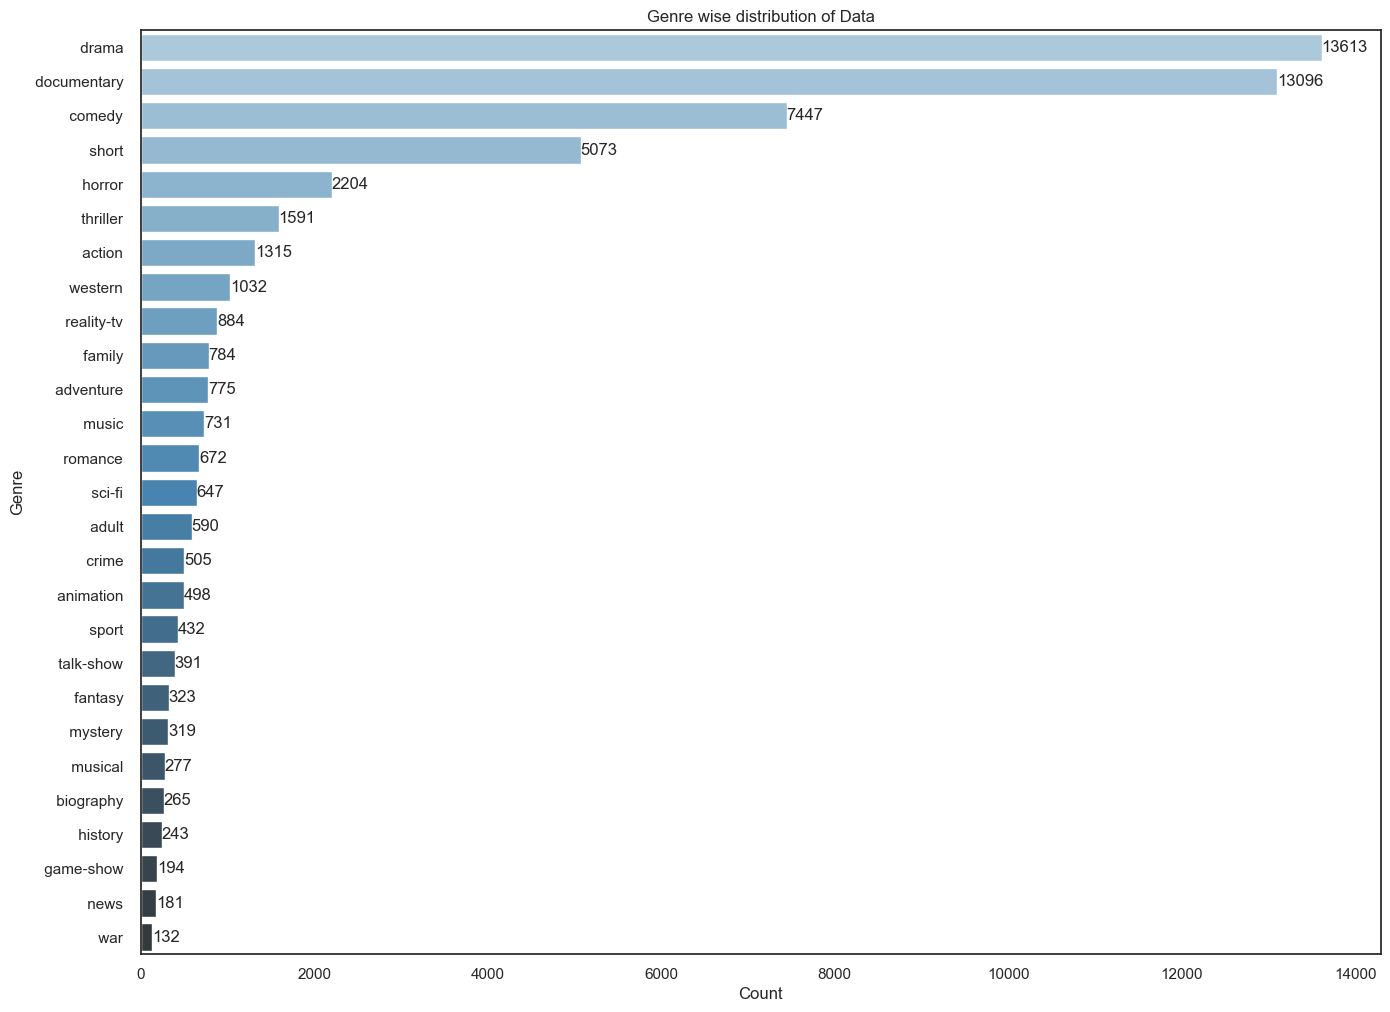

In [160]:
#Genre wise distribution

sns.set(style="white")
genre_to_count=pd.DataFrame({'Genre':df_train['Genre'].value_counts().index, 'Count':df_train['Genre'].value_counts().values})

plt.figure(figsize=(16,12))

plt.title('Genre wise distribution of Data')

ax = sns.barplot(y="Genre", x="Count", data=genre_to_count, palette="Blues_d")
for i in ax.containers:
    ax.bar_label(i, )

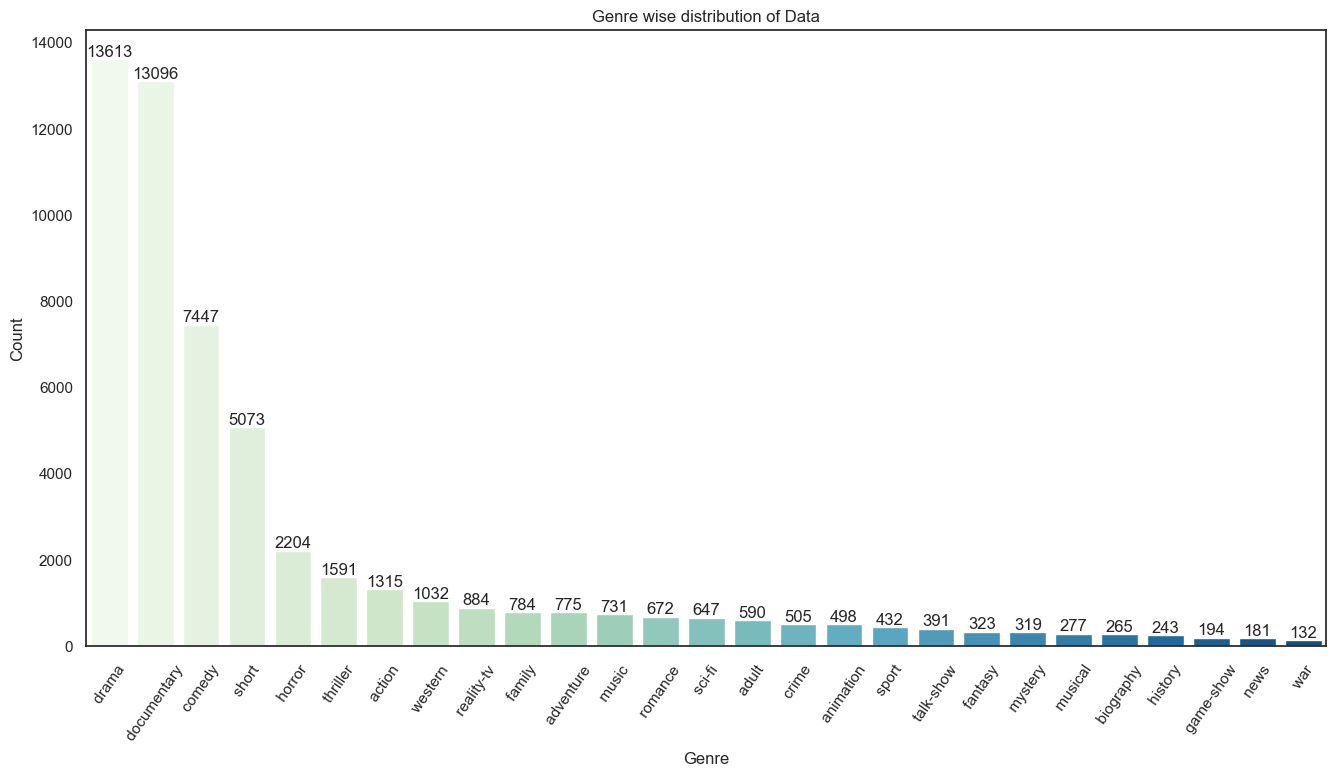

In [150]:
#Genre wise distribution
Genre = df_train['Genre'].value_counts().to_frame().reset_index()

Genre.columns = ['Genre','Count']

plt.figure(figsize = (16,8))

plt.title('Genre wise distribution of Data')
plt.xticks(rotation = 55)

ax=sns.barplot(x = Genre['Genre'],y = Genre['Count'],palette='GnBu')
for i in ax.containers:
    ax.bar_label(i, )

## Initialize Text Vectorization(TF-IDF) vectorizer

In [13]:
# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the training data
x_train_tfidf = tfidf_vectorizer.fit_transform(df_train['Description'])

# Transform the test data
y_train = df_train['Genre']

## Split Data and Train Model

In [14]:
x = x_train_tfidf
y = df_train['Genre']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [15]:
print("\nsize of x: ", x.shape)
print("\nsize of y: ", y.shape)


size of x:  (54214, 5000)

size of y:  (54214,)


In [128]:
print("\nsize of x_train: ", x_train.shape)
print("\nsize of x_test: ",x_test.shape)
print("\nsize of y_train: ",y_train.shape)
print("\nsize of y_test: ",y_test.shape)


size of x_train:  (43371, 5000)

size of x_test:  (10843, 5000)

size of y_train:  (43371,)

size of y_test:  (10843,)


In [17]:
model_1 = MultinomialNB()
model_1.fit(x_train, y_train)

MultinomialNB()

In [19]:
model_2 = BernoulliNB()
model_2.fit(x_train, y_train)

BernoulliNB()

In [21]:
model_3 = MLPClassifier()
model_3.fit(x_train, y_train)

MLPClassifier()

In [105]:
columns = ['Multinomial NB', 'Bernoulli NB', 'MLP Classifier']
NB_accuracies=[]

In [106]:
def call(NB_model):
    NB_model.fit(x_train, y_train)
    NB_y_pred = NB_model.predict(x_test)
    NB_accuracy = accuracy_score(y_test, NB_y_pred)

    NB_accuracies.append(NB_accuracy)
    
    print("________MODEL EVALUATION ON TEST DATA________")
    print("Model: ")
    print(NB_model)

    print("\nAccuracy of the Model: ")
    print(NB_accuracy)
    
    print("\nClassification Report: ")
    print(classification_report(y_test, NB_y_pred))

In [107]:
call(model_1)

________MODEL EVALUATION ON TEST DATA________
Model: 
MultinomialNB()

Accuracy of the Model: 
0.5120354145531679

Classification Report: 
               precision    recall  f1-score   support

      action        0.57      0.05      0.09       263
       adult        1.00      0.02      0.04       112
   adventure        0.44      0.03      0.05       139
   animation        0.00      0.00      0.00       104
   biography        0.00      0.00      0.00        61
      comedy        0.51      0.40      0.45      1443
       crime        0.00      0.00      0.00       107
 documentary        0.57      0.89      0.69      2659
       drama        0.45      0.84      0.58      2697
      family        0.00      0.00      0.00       150
     fantasy        0.00      0.00      0.00        74
   game-show        1.00      0.03      0.05        40
     history        0.00      0.00      0.00        45
      horror        0.77      0.27      0.40       431
       music        0.92      0.08 

In [108]:
call(model_2)

________MODEL EVALUATION ON TEST DATA________
Model: 
BernoulliNB()

Accuracy of the Model: 
0.5007839158904362

Classification Report: 
               precision    recall  f1-score   support

      action        0.34      0.42      0.37       263
       adult        0.54      0.46      0.49       112
   adventure        0.23      0.19      0.21       139
   animation        0.37      0.14      0.21       104
   biography        0.01      0.02      0.02        61
      comedy        0.50      0.53      0.51      1443
       crime        0.17      0.10      0.13       107
 documentary        0.75      0.65      0.70      2659
       drama        0.65      0.48      0.55      2697
      family        0.24      0.11      0.15       150
     fantasy        0.22      0.09      0.13        74
   game-show        0.52      0.30      0.38        40
     history        0.06      0.04      0.05        45
      horror        0.60      0.62      0.61       431
       music        0.33      0.73   

In [109]:
call(model_3)

________MODEL EVALUATION ON TEST DATA________
Model: 
MLPClassifier()

Accuracy of the Model: 
0.5216268560361523

Classification Report: 
               precision    recall  f1-score   support

      action        0.31      0.34      0.33       263
       adult        0.52      0.46      0.49       112
   adventure        0.23      0.24      0.24       139
   animation        0.29      0.18      0.22       104
   biography        0.00      0.00      0.00        61
      comedy        0.50      0.49      0.50      1443
       crime        0.19      0.13      0.15       107
 documentary        0.70      0.73      0.71      2659
       drama        0.57      0.60      0.58      2697
      family        0.16      0.17      0.16       150
     fantasy        0.07      0.04      0.05        74
   game-show        0.72      0.57      0.64        40
     history        0.08      0.02      0.03        45
      horror        0.58      0.56      0.57       431
       music        0.50      0.51 

## Accuracy on Train Dataset

In [110]:
y_train_pred1 = model_1.predict(x_train)
print(y_train_pred1)

y_train_accuracy1 = accuracy_score(y_train, y_train_pred1)
print("Accuracy: {:.2f}%".format(y_train_accuracy1 * 100))

[' short ' ' drama ' ' documentary ' ... ' drama ' ' comedy '
 ' documentary ']
Accuracy: 53.16%


In [111]:
y_train_pred2 = model_2.predict(x_train)
print(y_train_pred2)

y_train_accuracy2 = accuracy_score(y_train, y_train_pred2)
print("Accuracy: {:.2f}%".format(y_train_accuracy2 * 100))

[' short ' ' drama ' ' documentary ' ... ' drama ' ' comedy '
 ' documentary ']
Accuracy: 57.72%


In [112]:
y_train_pred3 = model_3.predict(x_train)
print(y_train_pred3)

y_train_accuracy3 = accuracy_score(y_train, y_train_pred3)
print("Accuracy: {:.2f}%".format(y_train_accuracy3 * 100))

[' drama ' ' drama ' ' documentary ' ... ' drama ' ' drama '
 ' documentary ']
Accuracy: 99.96%


## Accuracy of the models on Test Dataset

In [113]:
y_test_pred1 = model_1.predict(x_test)
print(prediction1)

y_test_accuracy1 = accuracy_score(y_test, y_test_pred1)
print("Accuracy: {:.2f}%".format(y_test_accuracy1 * 100))



[' drama ' ' drama ' ' documentary ' ... ' drama ' ' drama ' ' horror ']
Accuracy: 51.20%


In [114]:
y_test_pred2 = model_2.predict(x_test)
print(prediction2)

y_test_accuracy2 = accuracy_score(y_test, y_test_pred2)
print("Accuracy: {:.2f}%".format(y_test_accuracy2 * 100))

[' short ' ' drama ' ' documentary ' ... ' drama ' ' comedy '
 ' documentary ']
Accuracy: 50.08%


In [115]:
y_test_pred3 = model_3.predict(x_test)
print(y_test_pred3)

y_test_accuracy3 = accuracy_score(y_test, y_test_pred3)
print("Accuracy: {:.2f}%".format(y_test_accuracy3 * 100))

[' comedy ' ' drama ' ' action ' ... ' thriller ' ' short ' ' thriller ']
Accuracy: 52.16%


In [116]:
NB_accuracies

[0.5120354145531679, 0.5007839158904362, 0.5216268560361523]

In [118]:
NB_FinalResult = pd.DataFrame({'Models':columns, 'Accuracy':NB_accuracies})
NB_FinalResult

,Models,Accuracy
0,Multinomial NB,0.512035
1,Bernoulli NB,0.500784
2,MLP Classifier,0.521627


Text(0.5, 1.0, 'Model vs Accuracy_score')

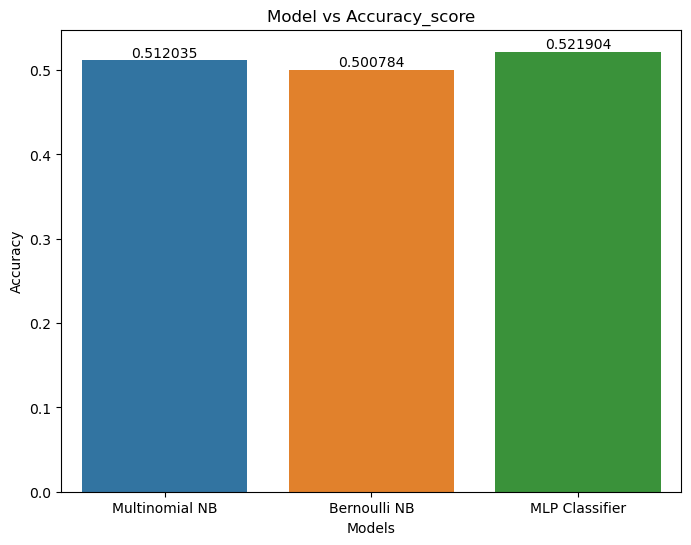

In [119]:
#Barplot of accuracies

plt.figure(figsize = (8, 6))

ax = sns.barplot(x = "Models", y = "Accuracy", data = FinalResult)
for i in ax.containers:
    ax.bar_label(i, )

plt.title('Model vs Accuracy_score')

In [96]:
LG_columns = ['Logistic Regression', 'Random Forest Classifier']
LG_accuracies=[]

In [97]:
model_4 = LogisticRegression()
model_5 = RandomForestClassifier()

In [98]:
def call(LG_model):
    LG_model.fit(x_train, y_train)
    LG_y_pred = LG_model.predict(x_test)
    LG_accuracy = accuracy_score(y_test, LG_y_pred)

    LG_accuracies.append(LG_accuracy)
    
    print("________MODEL EVALUATION ON TEST DATA________")
    print("Model: ")
    print(LG_model)
    
    print("\nAccuracy of the Model: ")
    print(LG_accuracy)
    
    print("\nClassification Report: ")
    print(classification_report(y_test, LG_y_pred))

In [99]:
call(model_4)

________MODEL EVALUATION ON TEST DATA________
Model: 
LogisticRegression()

Accuracy of the Model: 
0.5903347781979157

Classification Report: 
               precision    recall  f1-score   support

      action        0.53      0.27      0.36       263
       adult        0.80      0.21      0.34       112
   adventure        0.38      0.14      0.20       139
   animation        0.58      0.07      0.12       104
   biography        0.00      0.00      0.00        61
      comedy        0.53      0.60      0.56      1443
       crime        0.12      0.01      0.02       107
 documentary        0.67      0.87      0.75      2659
       drama        0.55      0.78      0.65      2697
      family        0.36      0.09      0.14       150
     fantasy        0.00      0.00      0.00        74
   game-show        1.00      0.47      0.64        40
     history        0.00      0.00      0.00        45
      horror        0.65      0.57      0.61       431
       music        0.63      

In [100]:
call(model_5)

________MODEL EVALUATION ON TEST DATA________
Model: 
RandomForestClassifier()

Accuracy of the Model: 
0.4748685788066033

Classification Report: 
               precision    recall  f1-score   support

      action        0.00      0.00      0.00       263
       adult        1.00      0.03      0.05       112
   adventure        0.67      0.04      0.08       139
   animation        0.00      0.00      0.00       104
   biography        0.00      0.00      0.00        61
      comedy        0.50      0.26      0.34      1443
       crime        1.00      0.01      0.02       107
 documentary        0.53      0.88      0.66      2659
       drama        0.41      0.83      0.55      2697
      family        0.80      0.03      0.05       150
     fantasy        0.00      0.00      0.00        74
   game-show        0.89      0.20      0.33        40
     history        0.00      0.00      0.00        45
      horror        0.64      0.04      0.08       431
       music        0.79  

In [101]:
LG_accuracies

[0.5903347781979157, 0.4748685788066033]

In [102]:
LG_FinalResult = pd.DataFrame({'Models':LG_columns, 'Accuracy':LG_accuracies})
LG_FinalResult

,Models,Accuracy
0,Logistic Regression,0.590335
1,Random Forest Classifier,0.474869


Text(0.5, 1.0, 'Model vs Accuracy_score')

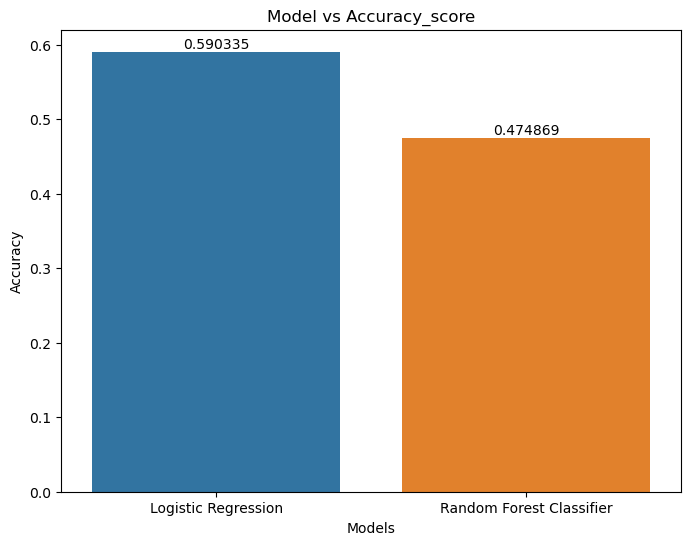

In [103]:
#Barplot of accuracies

plt.figure(figsize = (8, 6))

ax = sns.barplot(x = "Models", y = "Accuracy", data = LG_FinalResult)
for i in ax.containers:
    ax.bar_label(i, )

plt.title('Model vs Accuracy_score')

In [134]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
x_test = tfidf_vectorizer.fit_transform(x_test['Description'])

IndexError: Index dimension must be 1 or 2

In [132]:
# Use the trained model to make predictions on the test data

x_test_predictions = model_1.predict(x_test)
df_test['Predicted_Genre_NB'] = x_test_predictions

ValueError: Length of values (10843) does not match length of index (54200)

In [130]:
x_test.shape

(10843, 5000)

In [127]:
df_test.shape

(54200, 3)

In [133]:
if len(x_test_predictions) == len(df_test.index):
    df_test['Predicted_Genre_NB'] = x_test_predictions
else:
    print("Length of prediction array does not match DataFrame index.")
    print(f"Prediction array length: {len(x_test_predictions)}")
    print(f"DataFrame index length: {len(df_test.index)}")

Length of prediction array does not match DataFrame index.
Prediction array length: 10843
DataFrame index length: 54200


In [143]:
def get_sentence_embedding(sentence):
    words = re.findall(r'\w+', sentence.lower())
    vectors = [word2vec_model.wv[word] for word in words if word in word2vec_model.wv]
    return sum(vectors) / len(vectors) if vectors else [0] * 100

def train_model():
    df_train = pd.read_csv('C:/Users/sanso/Desktop/CODSOFT/MOVIE GENRE CLASSIFICATION/Genre Classification Dataset/train_data.txt', sep=':::', header=None, names=['Id', 'Title', 'Genre', 'Description'], engine='python')
    df_test = pd.read_csv("C:/Users/sanso/Desktop/CODSOFT/MOVIE GENRE CLASSIFICATION/Genre Classification Dataset/test_data.txt", sep=':::', names=['Id', 'Title', 'Description'], engine='python'

    combined_data = pd.concat([df_train, df_test], ignore_index=True)
    data = combined_data
    data = data.dropna()
    corpus = data["Description"].apply(lambda x: re.findall(r'\w+', x.lower()))
    word2vec_model = Word2Vec(corpus, vector_size=100, window=5, min_count=1, workers=4)


    def get_sentence_embedding(sentence):
        words = re.findall(r'\w+', sentence.lower())
        vectors = [word2vec_model.wv[word] for word in words if word in word2vec_model.wv]
        return sum(vectors) / len(vectors) if vectors else [0] * 100

    data["embeddings"] = data["Description"].apply(get_sentence_embedding)
    x = pd.DataFrame(data["embeddings"].to_list())
    label_encoder = LabelEncoder()
    data["genre_encoded"] = label_encoder.fit_transform(data["Genre"])
    y = data["genre_encoded"]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(x_train, y_train)

    return model, label_encoder

def predict_genre(model, label_encoder, new_descriptions):
    new_embeddings = [get_sentence_embedding(desc) for desc in new_descriptions]
    new_X = pd.DataFrame(new_embeddings)
    new_predictions = model.predict(new_X)
    predicted_genres = label_encoder.inverse_transform(new_predictions)

    return predicted_genres

trained_model, genre_label_encoder = train_model()

new_descriptions = ["A group of friends embark on an adventurous journey.","In a dystopian future, a hero rises to save the world.","A heartwarming story of family and friendship."]


predicted_genres = predict_genre(trained_model, genre_label_encoder, new_descriptions)

for desc, genre in zip(new_descriptions, predicted_genres):
    print(f"Description: {desc}")
    print(f"Predicted Genre: {genre}")
    print()

NameError: name 'word2vec_model' is not defined

In [161]:
columns = ['Multinomial NB', 'Bernoulli NB', 'MLP Classifier', 'Logistic Regression', 'RandomForestClassifier']
accuracies=[]

In [162]:
def call(model):
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    accuracy = accuracy_score(y_test, predictions)

    accuracies.append(accuracy)
    
    print("________MODEL EVALUATION ON TEST DATA________")
    print("Model: ")
    print(model)
    print()
    print("Accuracy of the Model: ")
    print(accuracy)

In [163]:
call(model_1)

________MODEL EVALUATION ON TEST DATA________
Model: 
MultinomialNB()

Accuracy of the Model: 
0.5120354145531679


In [164]:
call(model_2)

________MODEL EVALUATION ON TEST DATA________
Model: 
BernoulliNB()

Accuracy of the Model: 
0.5007839158904362


In [165]:
call(model_3)

________MODEL EVALUATION ON TEST DATA________
Model: 
MLPClassifier()

Accuracy of the Model: 
0.5244858434012727


In [166]:
call(model_4)

________MODEL EVALUATION ON TEST DATA________
Model: 
LogisticRegression()

Accuracy of the Model: 
0.5903347781979157


In [167]:
call(model_5)

________MODEL EVALUATION ON TEST DATA________
Model: 
RandomForestClassifier()

Accuracy of the Model: 
0.47726643917734946


In [168]:
accuracies

[0.5120354145531679,
 0.5007839158904362,
 0.5244858434012727,
 0.5903347781979157,
 0.47726643917734946]

In [169]:
FinalResult = pd.DataFrame({'Models':columns, 'Accuracy':accuracies})
FinalResult

,Models,Accuracy
0,Multinomial NB,0.512035
1,Bernoulli NB,0.500784
2,MLP Classifier,0.524486
3,Logistic Regression,0.590335
4,RandomForestClassifier,0.477266


Text(0.5, 1.0, 'Model vs Accuracy_score')

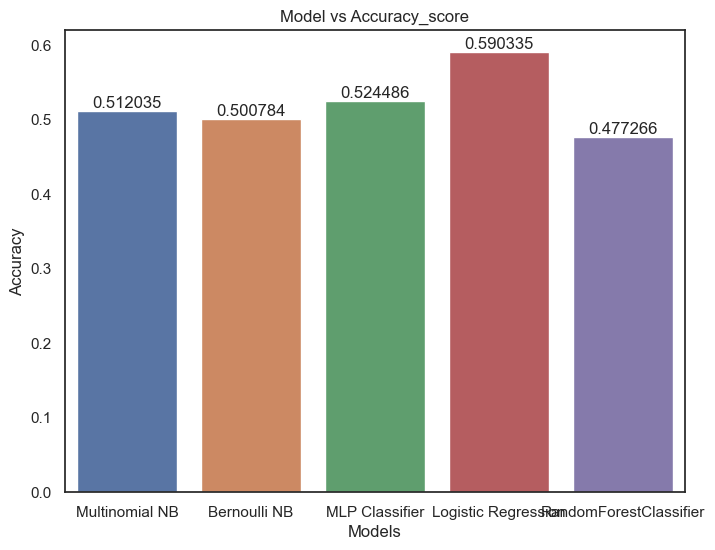

In [171]:
#Barplot of accuracies

plt.figure(figsize = (8, 6))

ax = sns.barplot(x = "Models", y = "Accuracy", data = FinalResult)
for i in ax.containers:
    ax.bar_label(i, )

plt.title('Model vs Accuracy_score')

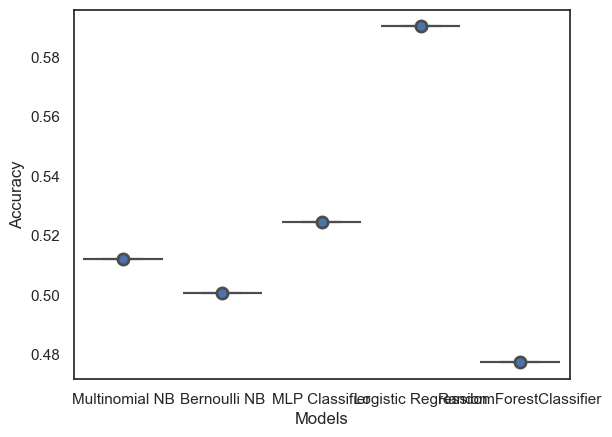

In [173]:
sns.boxplot(x='Models', y='Accuracy', data=FinalResult)

sns.stripplot(x='Models', y='Accuracy', data=FinalResult, size=8, jitter=True, edgecolor="gray", linewidth=2)

plt.show()